In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy import integrate as ig
from scipy.interpolate import interp1d
from functions import bb, getAM15, J0, J0_rad, SQ, Voc_rad, Vloss_Rau, LED_QE, linear, calculate_summary, set_up_plot, Vloss_Vandewal

In [2]:
os.getcwd()

'/home/jungbluth/Desktop/git/Voltage-Loss-Calculations'

In [3]:
T = 293 # [K] ambient & cell temperature
h = 6.626 * 10**(-34) # [kgm^2/s]
h_eV = 4.1357*10**(-15) # eV s
c = 2.998 * 10**(8) # [m/s]
k = 1.3806 * 10**(-23) # [kgm^2/s^2K]
k_eV = 8.6173*10**(-5) # eV / K
q = 1.60217662 * 10**(-19) # [C]
q_eV = 1
Vth = k_eV*T/q_eV # thermal voltage [eV]

### Import sEQE Data

#### (Replace and read in from file !!!)

In [4]:
ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR46_D_5_ZnPc_C60_2')
ZnPc_25 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR45_D_25_ZnPc_C60_5')
ZnPc_50 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR39_C_50_ZnPc_C60_4')
ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR45_A_75_ZnPc_C60_4')
ZnPc_95 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR61_D_95_ZnPc_C60_5')
ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR61_A_100_ZnPc_5')

In [5]:
F4ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR40_B_5_F4ZnPc_C60_2')
F4ZnPc_25 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR41_B_25_F4ZnPc_C60_2')
F4ZnPc_50 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR40_A_50_F4ZnPc_C60_5')
#F4ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR41_C_75_F4ZnPc_C60_4')
F4ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR41_A_75_F4ZnPc_C60_5')
F4ZnPc_95 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR66_B_95_F4ZnPc_C60_2')
F4ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR66_C_100_F4ZnPc_2')

In [6]:
# F8ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR55_D_5_F8ZnPc_C60_5')
F8ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR72_D_5_F8ZnPc_C60_1_(0.5TC)')
F8ZnPc_25 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR43_D_25_F8ZnPc_C60_1')
F8ZnPc_50 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR42_C_50_F8ZnPc_C60_7')
F8ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR43_A_75_F8ZnPc_C60_4')
F8ZnPc_95 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR56_B_95_F8ZnPc_C60_5')
F8ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR56_C_100_F8ZnPc_8')

In [7]:
# F16ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR50_A_5_F16ZnPc_C60_5')
F16ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR71_B_5_F16ZnPc_C60_2 (2)')
F16ZnPc_25 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR44_D_25_F16ZnPc_C60_1')
F16ZnPc_50 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR50_D_50_F16ZnPc_C60_7')
F16ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR57_C_75_F16ZnPc_C60_7')
F16ZnPc_95 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR58_D_95_F16ZnPc_C60_1')
#F16ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR58_A_100_F16ZnPc_5')
F16ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR72_A_100_F16ZnPc_1_(0.5TC)')

In [8]:
parameters = pd.read_excel('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_Voltage/Voltage_analysis/5_FxZnPc_Summary.xlsx')
parameters.head()

,Material,Number,Voc (V),Err_Voc (V),Jsc (mA/cm2),Err_Jsc (mA/cm2),FF,Err_FF,ECT (eV),Err_ECT (eV),...,Err_Eopt (eV),l (eV),Err_l (eV),f (eV2),Err_f (eV2),T1_exp (eV),T1_calc (eV),EQE File,Best_Voc,Best_Jsc
0,ZnPc,19,0.78,0.02,3.56,0.17,0.40,0.01,1.38,0.01,...,0.01,0.199,0.01,0.004235,0.001388,1.13,1.21,DR46_D_5_ZnPc_C60_2,0.76,3.74
1,F4ZnPc,13,0.89,0.02,3.10,0.17,0.33,0.01,1.45,0.01,...,0.01,0.136,0.03,0.000794,0.000506,1.13,1.20,DR40_B_5_F4ZnPc_C60_2,0.88,3.36
2,F8ZnPc,12,1.14,0.02,1.02,0.05,0.30,0.01,1.59,0.01,...,0.01,0.151,0.01,0.000097,0.000019,NaN,1.25,DR72_D_5_F8ZnPc_C60_1_(0.5TC),1.14,1.09
3,F16ZnPc,15,1.21,0.02,0.82,0.05,0.29,0.01,1.61,0.01,...,0.01,0.159,0.01,0.000035,NaN,NaN,1.18,DR71_B_5_F16ZnPc_C60_2 (2),1.24,0.87
4,C60,11,1.13,0.07,1.08,0.08,0.30,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.50,NaN,DR39_D_C60_2,1.26,0.99


### Calculate Relevant Parameters

#### Pull out relevant parameters

In [10]:
columns = parameters['EQE File'][:-1]
samples = [ZnPc_5, F4ZnPc_5, F8ZnPc_5, F16ZnPc_5]

EIP = [1.75, 1.68, 1.78, 1.71] # from inflection point
Voc = parameters['Voc (V)'][:-1]
Jsc = parameters['Jsc (mA/cm2)'][:-1]
ECT = parameters['ECT (eV)'][:-1]
f = parameters['f (eV2)'][:-1]
l = parameters['l (eV)'][:-1]

In [15]:
def Vloss_Vandewal(Jsc, ECT, f, l):
    """
    Function to calculate the radiative Voc loss defined using CT properties
    :param Jsc: measured short-circuit current density [float] [mA/cm**2]
    :param ET: fitted CT state energy [float] [eV]
    :param f: fitted oscillator strength / pre-absorption factor [float] [ev**2]
    :param l: fitted reorganization energy [float] [eV]
    :return: Delta_V_rad: radiative Voc loss [float] [V]
    """
    V_rad = ECT/q_eV + k_eV*T/q_eV * math.log((Jsc*h_eV**3*c**2)/(10*f*q*2*math.pi*(ECT-l))) # multiplied by q to convert eV to J
    Delta_V_rad_eV = - k_eV*T/q_eV * math.log((Jsc*h_eV**3*c**2)/(10*f*q*2*math.pi*(ECT-l))) # multiplied by q to convert eV to J
    
    return V_rad, Delta_V_rad_eV

In [12]:
def J0(EQE_EL, ECT, f, l):
    a = (math.sqrt(4*np.pi*l*k_eV*T))*np.exp(-(ECT+l)**2 / (4*l*k_eV*T))
    b = np.pi*(ECT-l)*np.exp(-ECT/(k_eV*T))
    J0 = q/EQE_EL * f/(h_eV**3 * c**2) * (a + b)
    
    J0_2 = q/EQE_EL * f/(h_eV**3 * c**2) * (b)
    
    return J0, J0_2

In [78]:
E = ZnPc_5['Energy']
bb_df = bb(E)

In [79]:
J0_(ZnPc_5, bb_df, 5.618478E-07)

(1.3630116790431607e-13, 1.3323086616564434e-13)

In [38]:
summary = calculate_summary(columns, samples, Voc, Jsc, ECT, EIP, f, l)
summary
# summary.to_csv('/home/jungbluth/Desktop/Voc_Loss_comparison')

,Sample,Jsc [mA/cm2],ECT [V],Voc [V],"Voc,SQ [V]","J0,rad [mA/cm2]","Voc,rad [V]","Voc,rad [V] (Vandewal)","Delta Voc,SC [V] (Rau)","Delta Voc,rad [V] (Rau)","Delta Voc,rad [V] (Vandewal)","Delta Voc,rad [V] (ECT - Delta Voc,rad)","Delta Voc,nonrad [V]","Delta Voc,nonrad [V] (Rau)",LED QE
0,DR46_D_5_ZnPc_C60_2,3.56,1.38,0.78,1.473443,7.658051e-20,1.143369,1.010989,0.044832,0.285242,0.369011,0.236631,0.363369,0.363369,5.618478e-07
1,DR40_B_5_F4ZnPc_C60_2,3.10,1.45,0.89,1.406645,1.562512e-21,1.238141,1.117069,0.050652,0.117852,0.332931,0.211859,0.348141,0.348141,1.026942e-06
2,DR72_D_5_F8ZnPc_C60_1_(0.5TC),1.02,1.59,1.14,1.501703,1.523239e-24,1.385125,1.279791,0.075308,0.041270,0.310209,0.204875,0.245125,0.245125,6.075149e-05
3,DR71_B_5_F16ZnPc_C60_2 (2),0.82,1.61,1.21,1.434923,9.675607e-24,1.332937,1.319808,0.083265,0.018721,0.290192,0.277063,0.122937,0.122937,7.679602e-03


In [16]:
x = 0

Vloss_Vandewal(parameters['Jsc (mA/cm2)'][x], parameters['ECT (eV)'][x], parameters['f (eV2)'][x], parameters['l (eV)'][x])

(1.0109892836297567, 0.36901071637024313)

In [29]:
def revert_Voc_rad(V_rad, ECT, Jsc,l):
    f = (Jsc/10)*(h_eV**3*c**2) /(q*2*math.pi*(ECT-l)*math.exp((ECT-q_eV*V_rad)/(k_eV*T)))
#     f = (Jsc/10)*(h**3*c**2) /(q*2*math.pi*(ECT-l)*math.exp((ECT-q*V_rad)/(k*T)))
    return f

In [30]:
revert_Voc_rad(V_rad = summary['Voc,rad [V]'][0], ECT=summary['ECT [V]'][0], Jsc=summary['Jsc [mA/cm2]'][0], l = parameters['l (eV)'][0])

1.619567827175709e-13

In [43]:
from matplotlib import pyplot as mp
import numpy as np

T = 300
def gaussian(ECT, l):
    a = (math.sqrt(4*np.pi*l*k_eV*T))*np.exp(-(ECT+l)**2 / (4*l*k_eV*T))
    b = np.pi*(ECT-l)*np.exp(-ECT/(k_eV*T))
    
    return a, b

In [44]:
gaussian(parameters['ECT (eV)'][0], parameters['l (eV)'][0])

(6.112567484334173e-54, 2.4340563777599585e-23)

### Plot Parameters

In [10]:
markersize = 7
capsize = 5

plot_colors = ['#f0d314', '#ff7f1e', '#ed0b4f', '#a80078', '#070d8b']

#### EQE Fitting Results

#### CT State & Voltage Trends

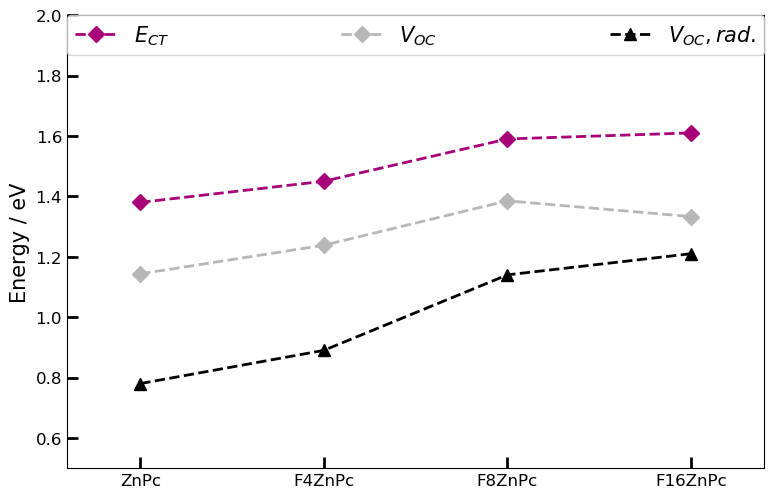

In [23]:
# Plot settings
values = [ 0.25, 0.50, 0.75, 1]
labels = ['ZnPc', 'F4ZnPc', 'F8ZnPc', 'F16ZnPc']
x_label = None
y_label = 'Energy / eV'
plot_labels = ['$E_{CT}$', '$V_{OC}$', '$V_{OC},rad.$']

# Set up & draw plot
fig = set_up_plot(x_label = x_label, y_label = y_label, values = values, labels = labels)

plt.plot(values, summary['ECT [V]'], 'D', markersize=8, linestyle='--', linewidth=2, label=plot_labels[0], color=plot_colors[3])
plt.plot(values, summary['Voc,rad [V]'], 'D', markersize=8, linestyle='--', linewidth=2, label=plot_labels[1], color='#b7b7b7ff')
plt.plot(values, summary['Voc [V]'], '^', markersize=8, linestyle='--', linewidth=2, label=plot_labels[2], color='black')

plt.xlim(0.15, 1.1)
plt.ylim(0.5, 2)
plt.legend(fontsize = 15, loc=2, ncol=3, mode="expand", borderaxespad=0.) # bbox_to_anchor=(0.05, 1.1, 0.9, .102),

# plt.savefig('/home/jungbluth/Desktop/100_FxZnPc_Voc_Trends.png')